libraries required for analysing the heart disease prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

DATA COLLECTION - loading the csv file

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\data trained\Files-main\heart_disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


finding the dimension of the data

In [3]:
df.shape

(303, 15)

DATA CLEANING - removing the unwanted column (in the y full axis) from the data and display the head

In [3]:
df = df.drop('Unnamed: 0',axis=1)

to check the presence of null values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

renaming the column names

In [6]:
df = df.rename(columns={'cp': 'chestpain', 'fbs': 'fast_bloodsugar','trestbps':'rest_bp','thalach':'maxheart_rate','exang':'exc_angina','ca':'coronry_artry','thal':'thal'}) 
df.head()

,age,sex,chestpain,rest_bp,chol,fast_bloodsugar,restecg,maxheart_rate,exc_angina,oldpeak,slope,coronry_artry,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    int64  
 2   chestpain        303 non-null    int64  
 3   rest_bp          303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fast_bloodsugar  303 non-null    int64  
 6   restecg          303 non-null    int64  
 7   maxheart_rate    303 non-null    int64  
 8   exc_angina       303 non-null    int64  
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    int64  
 11  coronry_artry    303 non-null    int64  
 12  thal             303 non-null    int64  
 13  target           303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


finding the no. of unique data present

In [8]:
df.nunique()

age                 41
sex                  2
chestpain            4
rest_bp             49
chol               152
fast_bloodsugar      2
restecg              3
maxheart_rate       91
exc_angina           2
oldpeak             40
slope                3
coronry_artry        5
thal                 4
target               2
dtype: int64

In [9]:
df.describe()

,age,sex,chestpain,rest_bp,chol,fast_bloodsugar,restecg,maxheart_rate,exc_angina,oldpeak,slope,coronry_artry,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


to understand how many male and female have features

In [10]:
hr=df.groupby('sex')
print(hr.sum())

       age  chestpain  rest_bp   chol  fast_bloodsugar  restecg  \
sex                                                               
0     5345        100    12776  25085               12       55   
1    11128        193    27106  49533               33      105   

     maxheart_rate  exc_angina  oldpeak  slope  coronry_artry  thal  target  
sex                                                                          
0            14508          22     84.1    137             53   204      72  
1            30835          77    230.9    287            168   497      93  


rename the categories of numerical value

In [11]:
gen=pd.Categorical(df['sex'])
gen=gen.rename_categories(['M','F'])
gen.describe()

,counts,freqs
categories,,
M,96,0.316832
F,207,0.683168


In [12]:
ta=pd.Categorical(df['thal'])
ta=ta.rename_categories(['HA1','HA2','HB1','HB2'])
ta.describe()

,counts,freqs
categories,,
HA1,2,0.006601
HA2,18,0.059406
HB1,166,0.547855
HB2,117,0.386139


In [13]:
CP=pd.Categorical(df['chestpain'])
CP=CP.rename_categories(['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
CP.describe()

,counts,freqs
categories,,
Typical Angina,143,0.471947
Atypical Angina,50,0.165017
Non-Anginal Pain,87,0.287129
Asymptomatic,23,0.075908


In [14]:
df['thal']=ta
df['sex']=gen
df['chestpain']=CP
df.head(10)

,age,sex,chestpain,rest_bp,chol,fast_bloodsugar,restecg,maxheart_rate,exc_angina,oldpeak,slope,coronry_artry,thal,target
0,63,F,Asymptomatic,145,233,1,0,150,0,2.3,0,0,HA2,1
1,37,F,Non-Anginal Pain,130,250,0,1,187,0,3.5,0,0,HB1,1
2,41,M,Atypical Angina,130,204,0,0,172,0,1.4,2,0,HB1,1
3,56,F,Atypical Angina,120,236,0,1,178,0,0.8,2,0,HB1,1
4,57,M,Typical Angina,120,354,0,1,163,1,0.6,2,0,HB1,1
5,57,F,Typical Angina,140,192,0,1,148,0,0.4,1,0,HA2,1
6,56,M,Atypical Angina,140,294,0,0,153,0,1.3,1,0,HB1,1
7,44,F,Atypical Angina,120,263,0,1,173,0,0.0,2,0,HB2,1
8,52,F,Non-Anginal Pain,172,199,1,1,162,0,0.5,2,0,HB2,1
9,57,F,Non-Anginal Pain,150,168,0,1,174,0,1.6,2,0,HB1,1


preprocessing technique - correlation

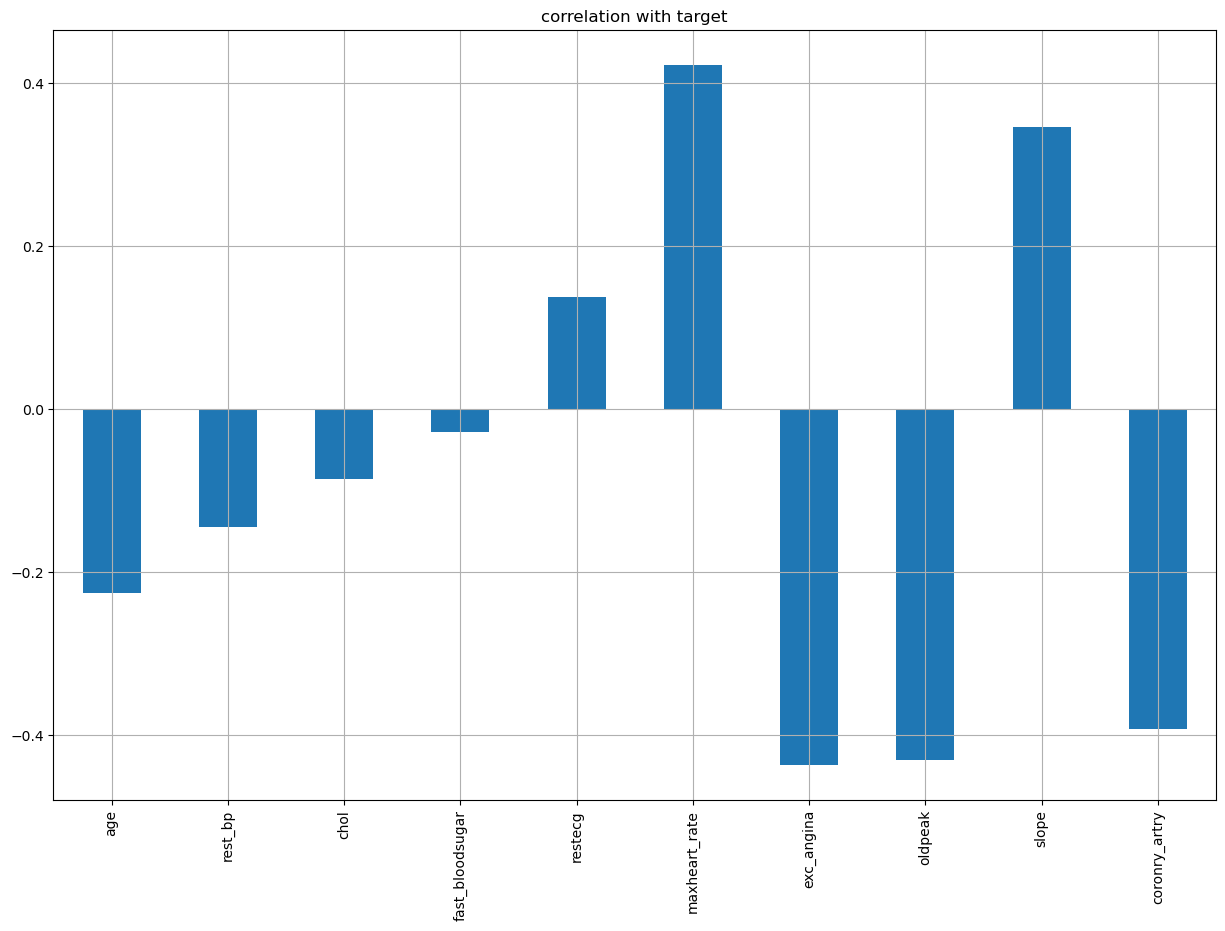

In [15]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(15,10),title='correlation with target')
plt.show()

dropping columns

In [16]:
df = df.drop('exc_angina',axis=1)
df = df.drop('coronry_artry',axis=1)
df = df.drop('slope',axis=1)
df.head()


,age,sex,chestpain,rest_bp,chol,fast_bloodsugar,restecg,maxheart_rate,oldpeak,thal,target
0,63,F,Asymptomatic,145,233,1,0,150,2.3,HA2,1
1,37,F,Non-Anginal Pain,130,250,0,1,187,3.5,HB1,1
2,41,M,Atypical Angina,130,204,0,0,172,1.4,HB1,1
3,56,F,Atypical Angina,120,236,0,1,178,0.8,HB1,1
4,57,M,Typical Angina,120,354,0,1,163,0.6,HB1,1


OUTLIERS

<Axes: >

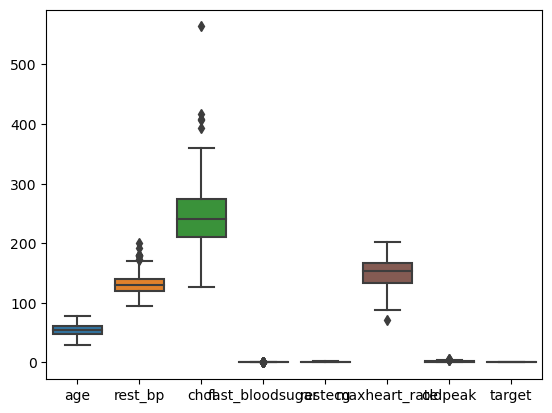

In [17]:
sns.boxplot(df)

In [37]:
U_L=df['rest_bp'].mean()+ 2*df['rest_bp'].std()
L_L=df['rest_bp'].mean()- 2*df['rest_bp'].std()
print(U_L)
print(L_L)
df.loc[(df['rest_bp']>U_L) | (df['rest_bp']<L_L)]

170.7350895701781
95.2128270964886


,age,sex,chestpain,rest_bp,chol,fast_bloodsugar,restecg,maxheart_rate,oldpeak,thal,target
26,56,M,Typical Angina,200,288,1,0,133,4.0,HB2,0
47,55,M,Typical Angina,180,327,0,2,117,3.4,HB1,0
72,59,M,Typical Angina,174,249,0,1,143,0.0,HB1,0
73,64,M,Typical Angina,180,325,0,1,154,0.0,HB1,1
90,39,M,Non-Anginal Pain,94,199,0,1,179,0.0,HB1,1
94,66,M,Typical Angina,178,228,1,1,165,1.0,HB2,0
113,51,F,Non-Anginal Pain,94,227,0,1,154,0.0,HB2,1
137,68,F,Non-Anginal Pain,180,274,1,0,150,1.6,HB2,0
145,52,F,Non-Anginal Pain,172,199,1,1,162,0.5,HB2,1
152,59,F,Asymptomatic,178,270,0,0,145,4.2,HB2,1


In [19]:
U_L=df['chol'].mean()+ 2*df['chol'].std()
L_L=df['chol'].mean()- 2*df['chol'].std()
print(U_L)
print(L_L)
df.loc[(df['chol']>U_L) | (df['chol']<L_L)]

349.92552837850036
142.60252442678018


,age,sex,chestpain,rest_bp,chol,fast_bloodsugar,restecg,maxheart_rate,oldpeak,thal,target
4,57,M,Typical Angina,120,354,0,1,163,0.6,HB1,1
28,65,M,Non-Anginal Pain,140,417,1,0,157,0.8,HB1,1
39,65,M,Non-Anginal Pain,160,360,0,0,151,0.8,HB1,1
53,44,M,Non-Anginal Pain,108,141,0,1,175,0.6,HB1,1
85,67,M,Non-Anginal Pain,115,564,0,0,160,1.6,HB2,1
96,62,M,Typical Angina,140,394,0,0,157,1.2,HB1,1
111,57,F,Non-Anginal Pain,150,126,1,1,173,0.2,HB2,1
180,55,F,Typical Angina,132,353,0,1,132,1.2,HB2,0
220,63,M,Typical Angina,150,407,0,0,154,4.0,HB2,0
246,56,M,Typical Angina,134,409,0,0,150,1.9,HB2,0


trim off the outliers

In [20]:
new=df.loc[(df['rest_bp']<U_L) & (df['rest_bp']>L_L)]
print("with outliers in data ", len(df))
print("after removing outliers in data",len(new))
print(" outliers detected are : " ,len(df)-len(new))

with outliers in data  303
after removing outliers in data 62
 outliers detected are :  241


In [38]:
new=df.loc[(df['chol']<U_L) & (df['chol']>L_L)]
print("with outliers in data ", len(df))
print("after removing outliers in data",len(new))
print(" outliers detected are : " ,len(df)-len(new))

with outliers in data  192
after removing outliers in data 6
 outliers detected are :  186


In [22]:
len(new)

292

In [23]:
new=df.copy()
new.loc[new['rest_bp']>U_L,'rest_bp']=U_L
new.loc[new['rest_bp']<L_L,'rest_bp']=L_L
len(new)

303

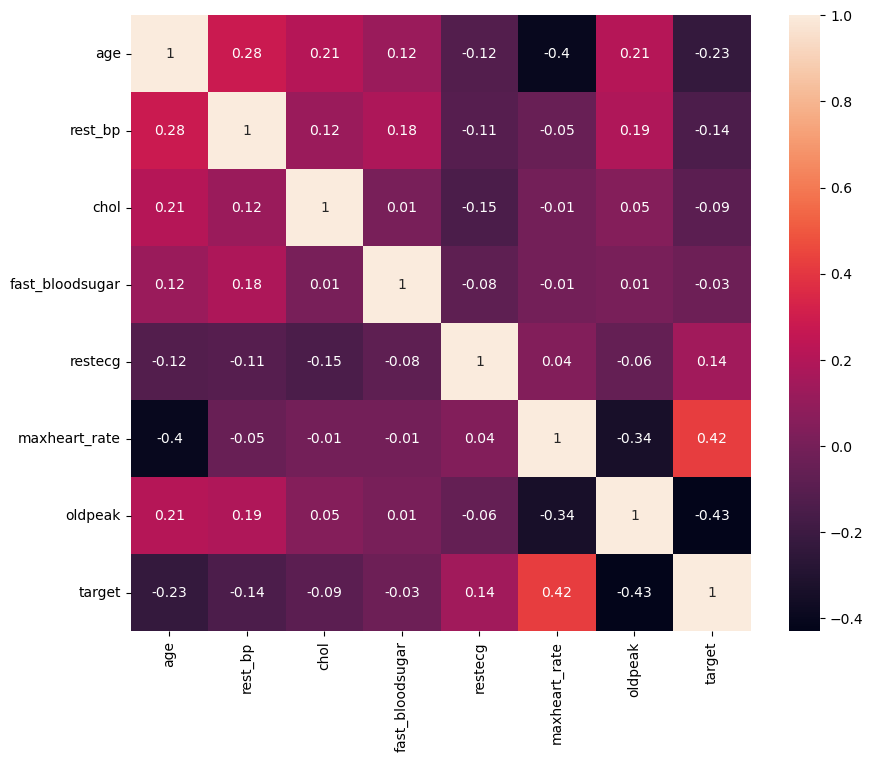

In [24]:
cr=df.corr().round(2)
plt.figure(figsize=(10,8))
plot=sns.heatmap(cr, annot=True)

to find which array location has highest cholestrol

In [25]:
maxi=np.where(df['chol']==max(df['chol']))
df.loc[maxi]

,age,sex,chestpain,rest_bp,chol,fast_bloodsugar,restecg,maxheart_rate,oldpeak,thal,target
85,67,M,Non-Anginal Pain,115,564,0,0,160,1.6,HB2,1


list of people having cholestrol above 350

In [26]:
print(df[df['chol']>350])

     age sex         chestpain  rest_bp  chol  fast_bloodsugar  restecg  \
4     57   M    Typical Angina      120   354                0        1   
28    65   M  Non-Anginal Pain      140   417                1        0   
39    65   M  Non-Anginal Pain      160   360                0        0   
85    67   M  Non-Anginal Pain      115   564                0        0   
96    62   M    Typical Angina      140   394                0        0   
180   55   F    Typical Angina      132   353                0        1   
220   63   M    Typical Angina      150   407                0        0   
246   56   M    Typical Angina      134   409                0        0   

     maxheart_rate  oldpeak thal  target  
4              163      0.6  HB1       1  
28             157      0.8  HB1       1  
39             151      0.8  HB1       1  
85             160      1.6  HB2       1  
96             157      1.2  HB1       1  
180            132      1.2  HB2       0  
220            154     

varient analysis using graphs 

<Axes: >

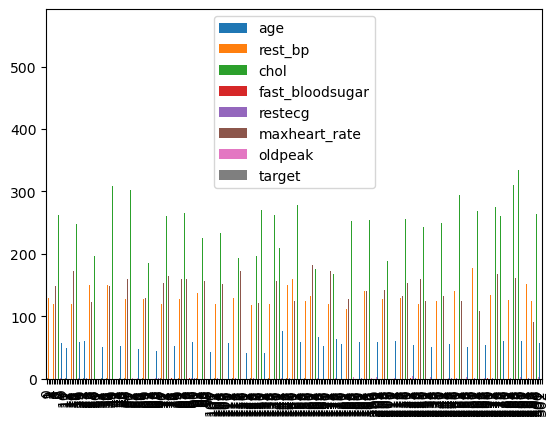

In [27]:
df.plot(kind='bar')

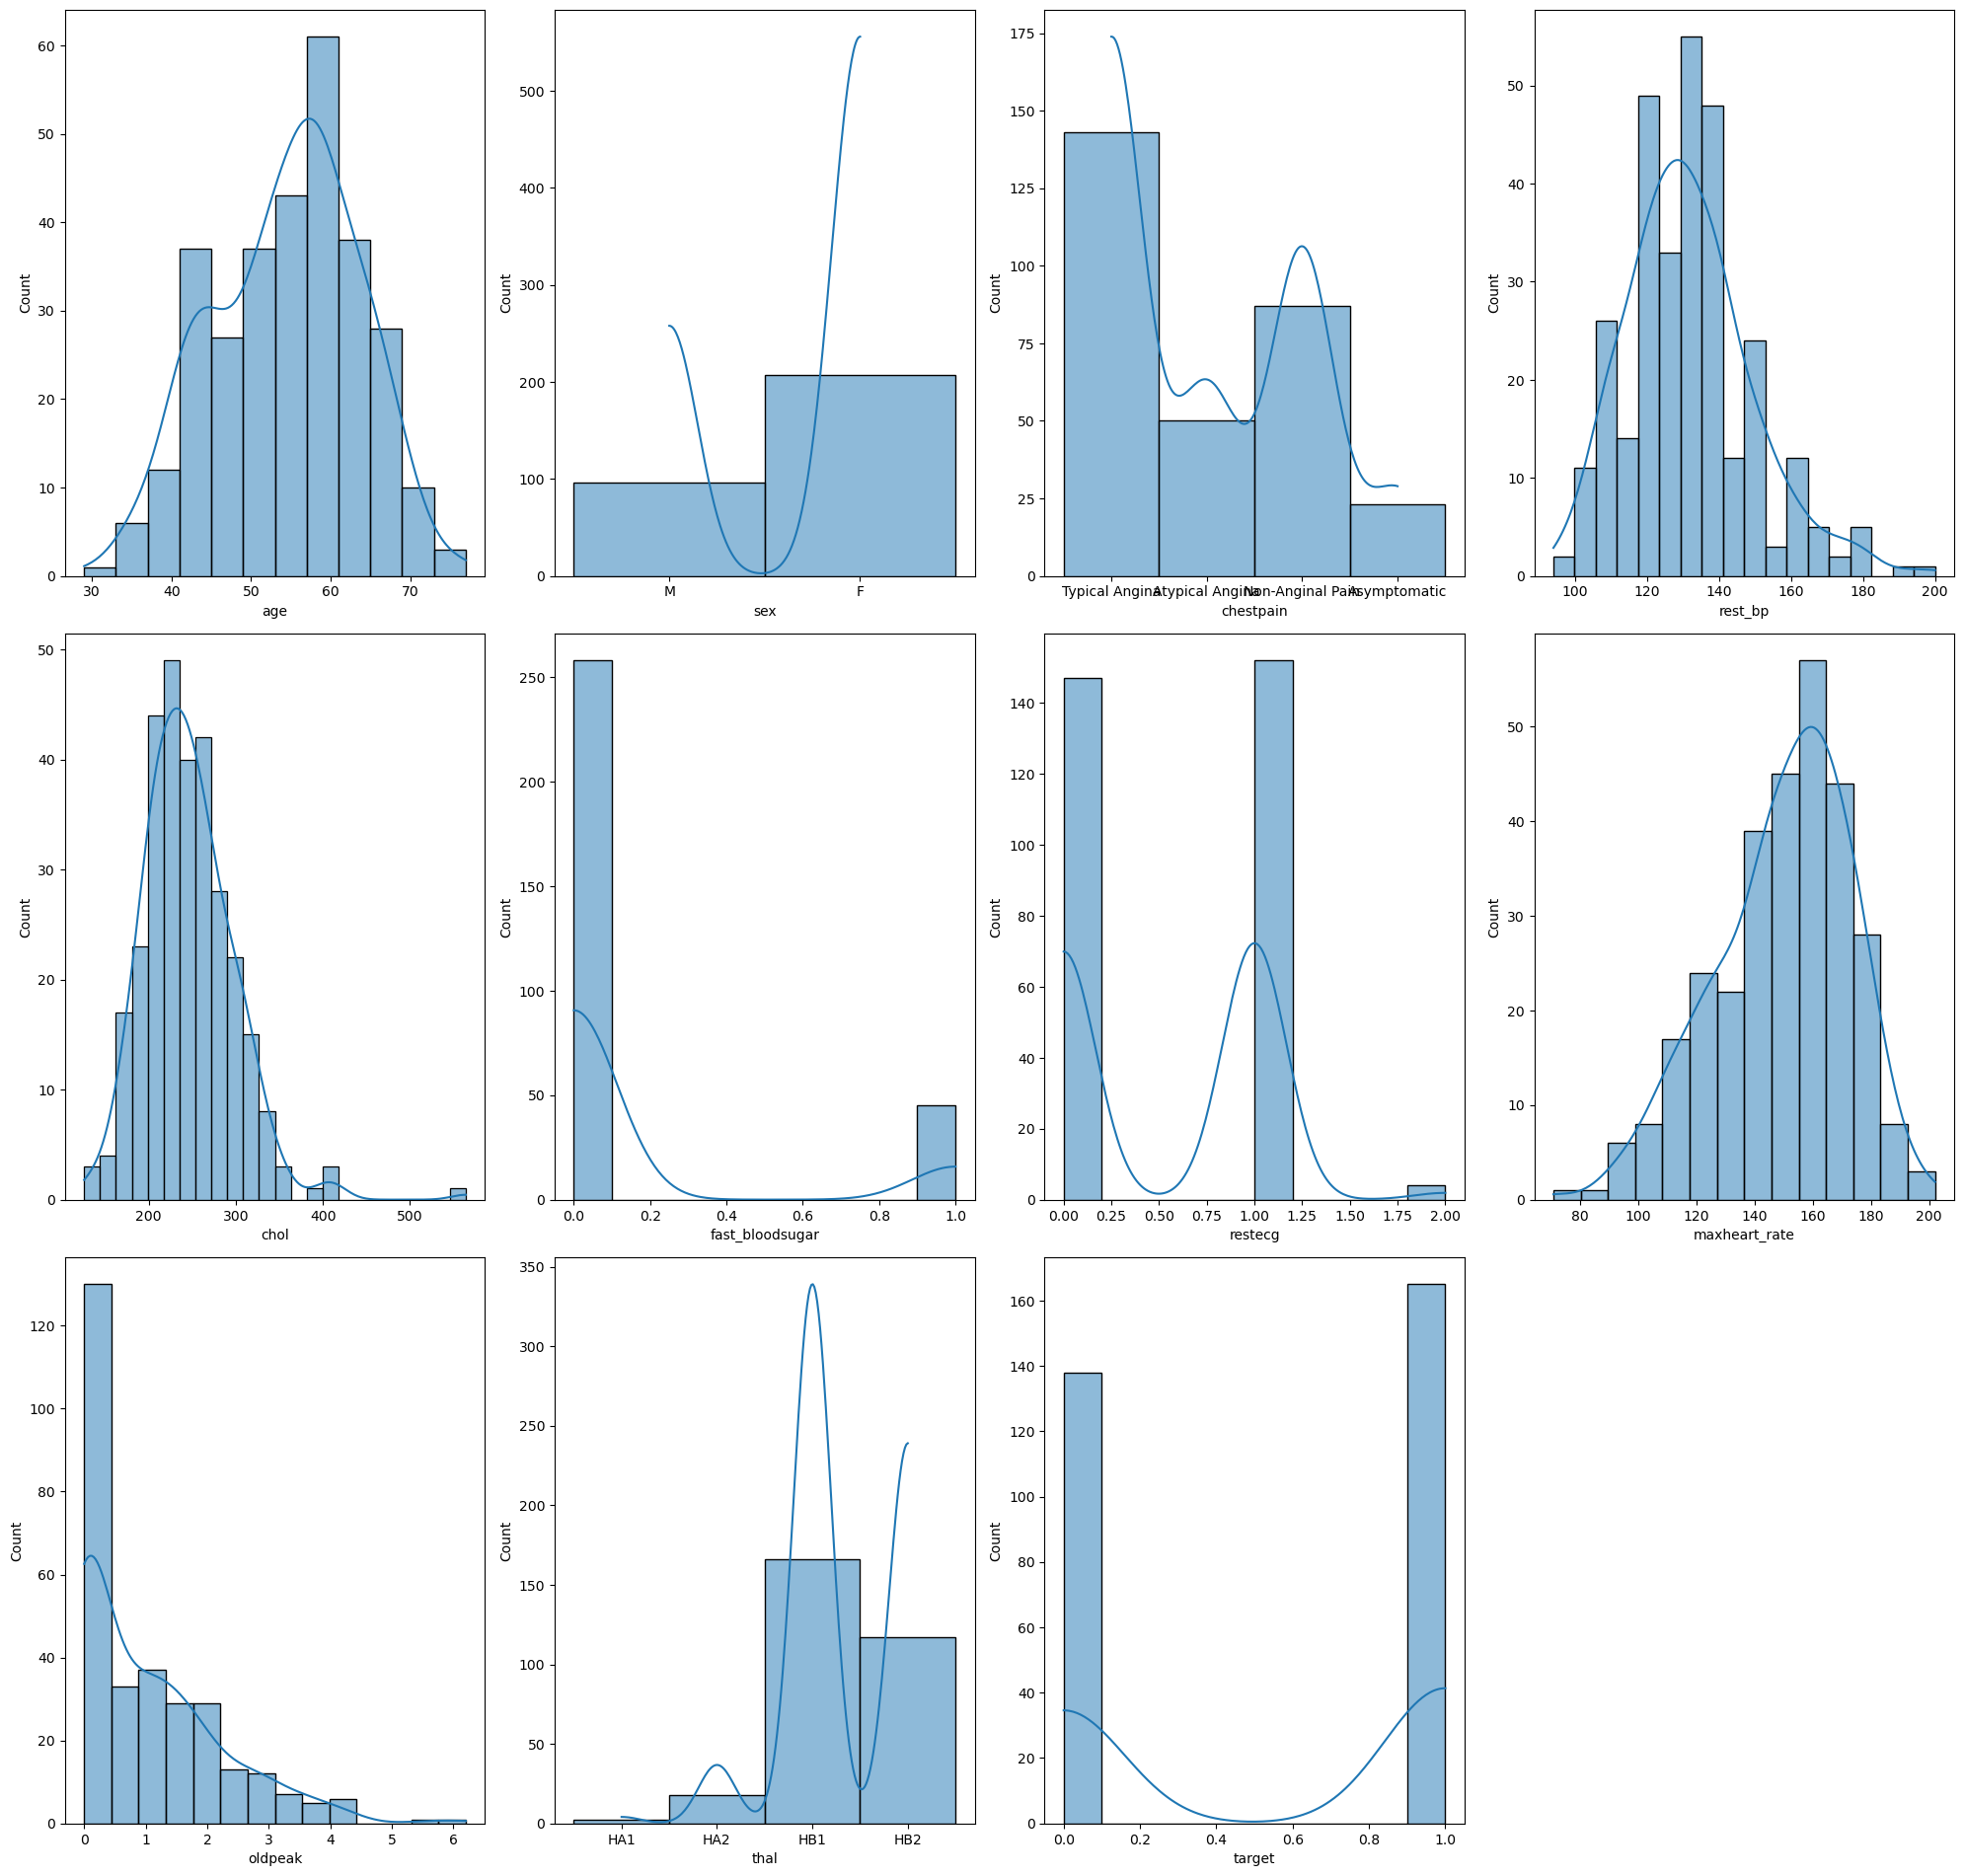

In [28]:
plt.figure(figsize=(20, 25))
pltno = 1

for i in df.columns:
    if pltno <= 16:
        ax = plt.subplot(4, 4, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show() 

<Axes: >

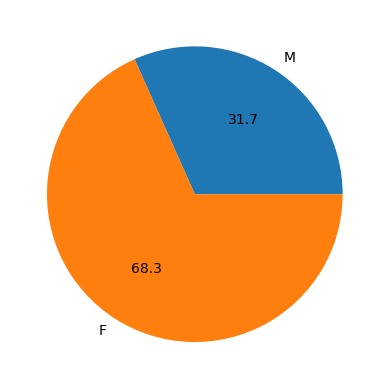

In [29]:
df.groupby('sex').size().plot(kind='pie',autopct='%.1f')

change the biased data

In [30]:
gender_counts = df['sex'].value_counts()
print(gender_counts)
# Find the minimum count (assuming you want to balance the data)
min_count = min(gender_counts)
print(min_count)
# Resample the data to balance by gende
df= df.groupby('sex').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


F    207
M     96
Name: sex, dtype: int64
96


<Axes: >

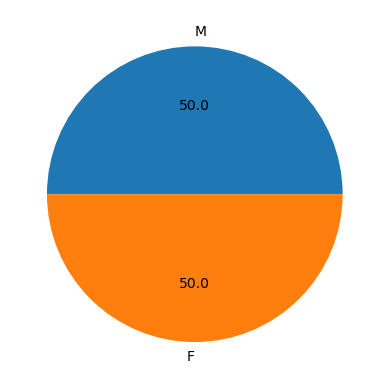

In [31]:
df.groupby('sex').size().plot(kind='pie',autopct='%.1f')

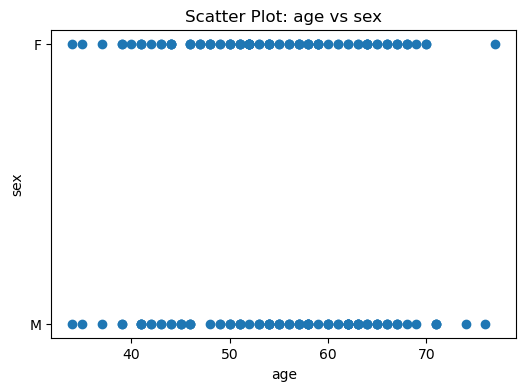

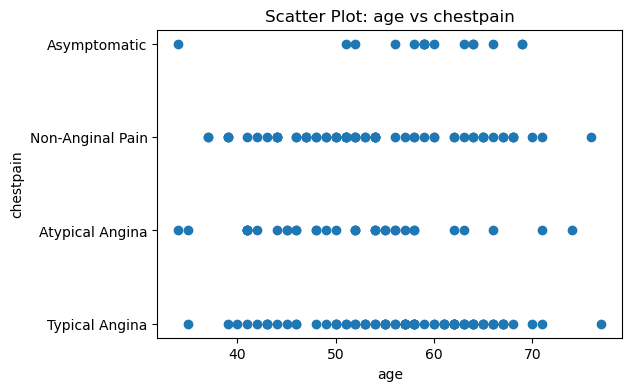

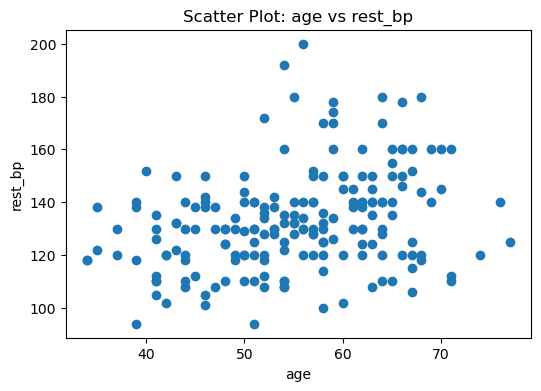

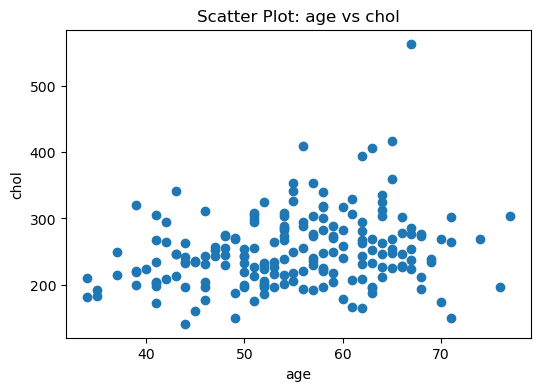

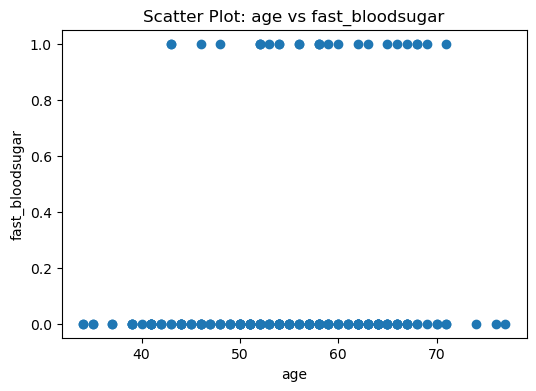

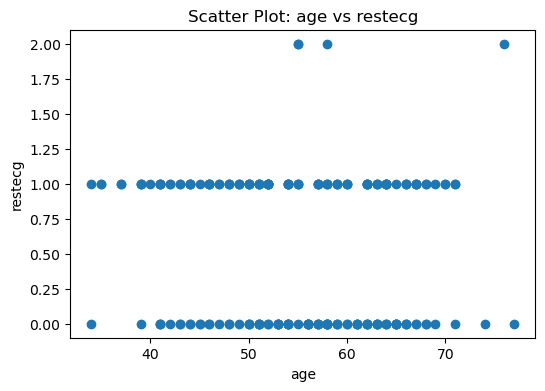

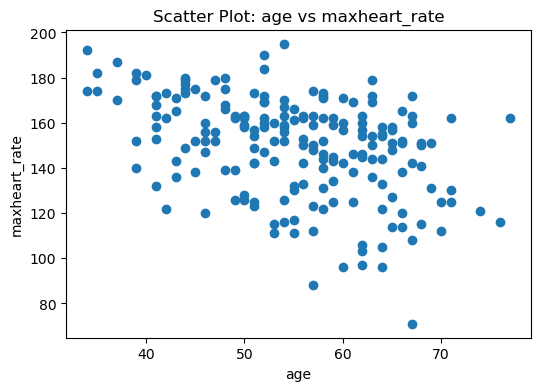

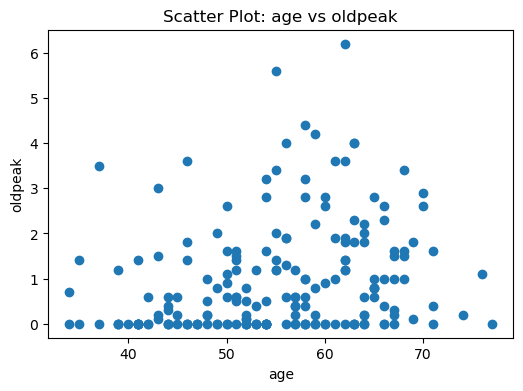

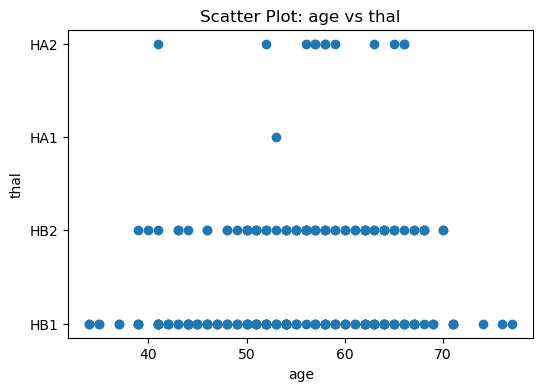

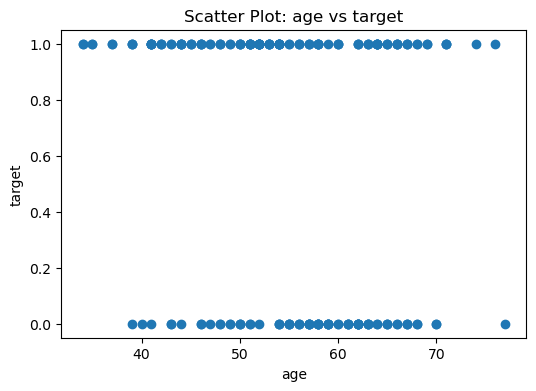

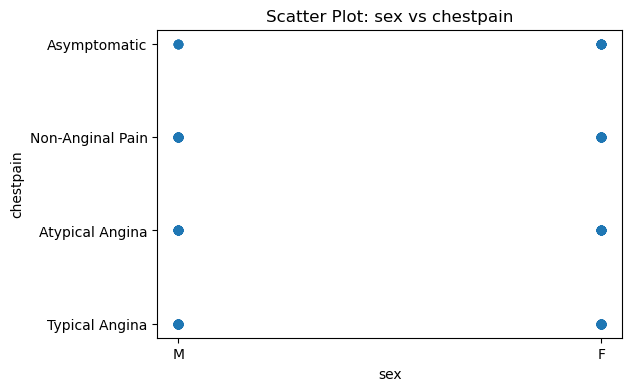

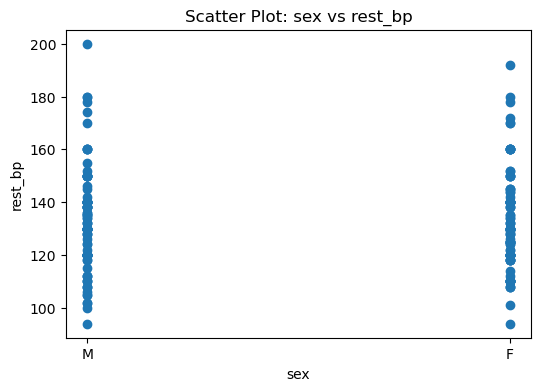

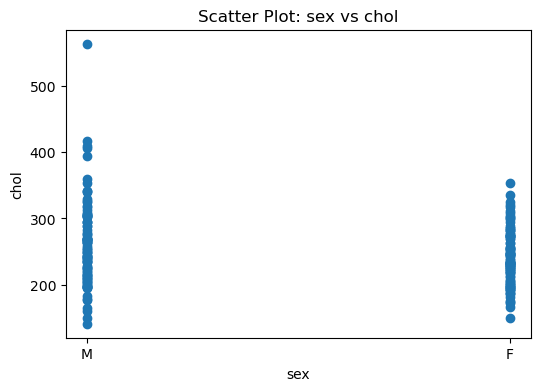

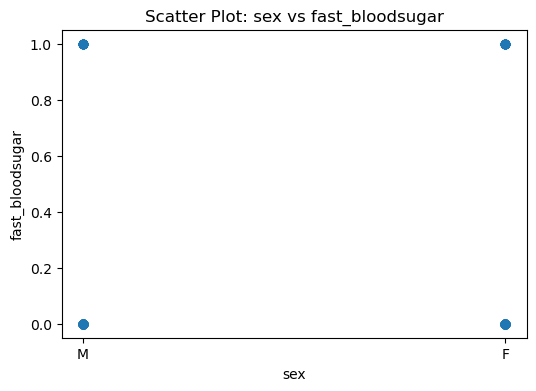

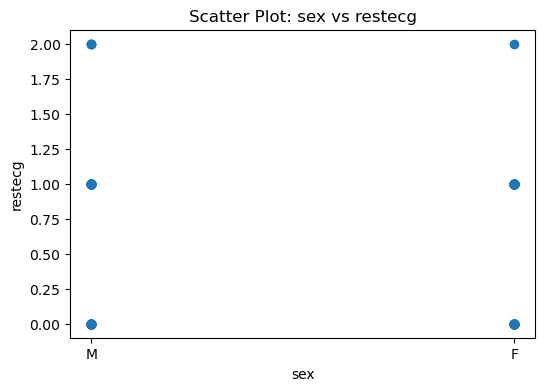

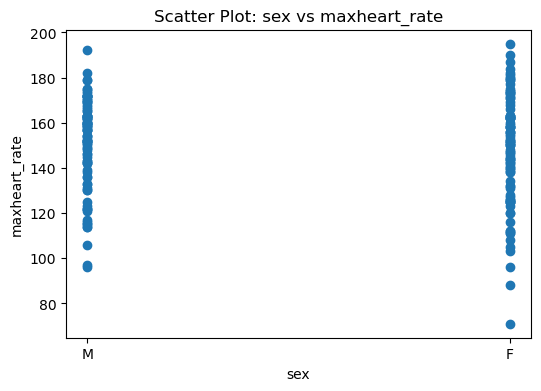

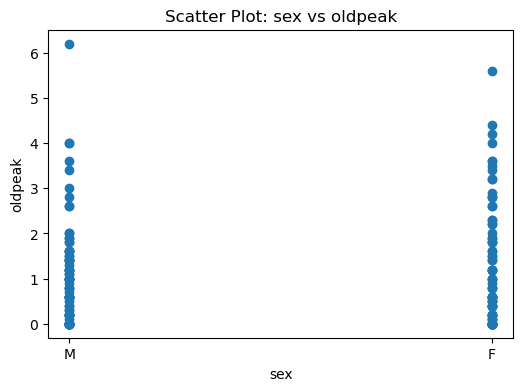

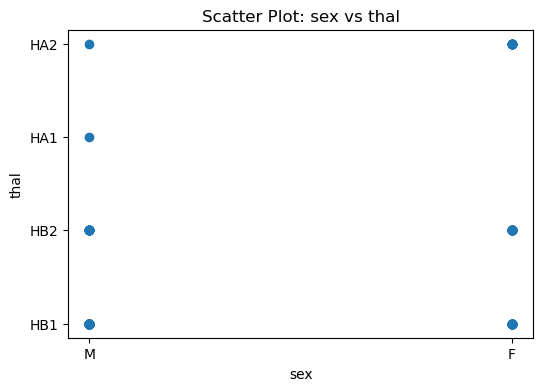

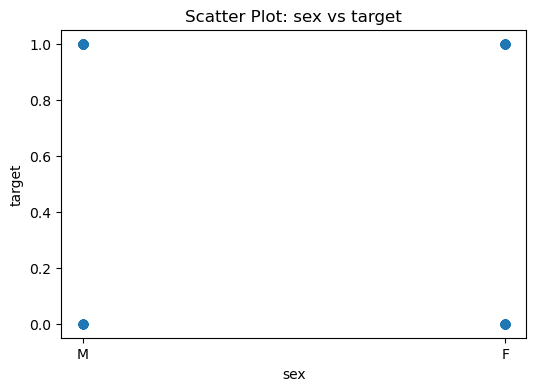

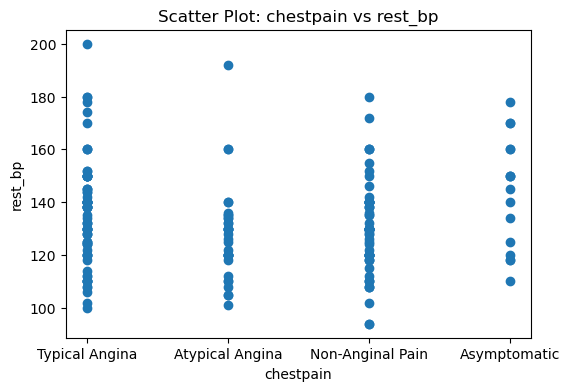

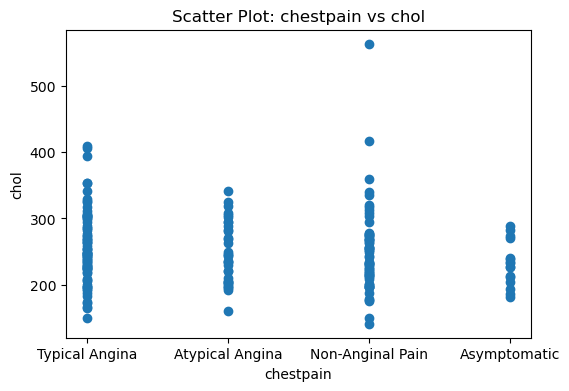

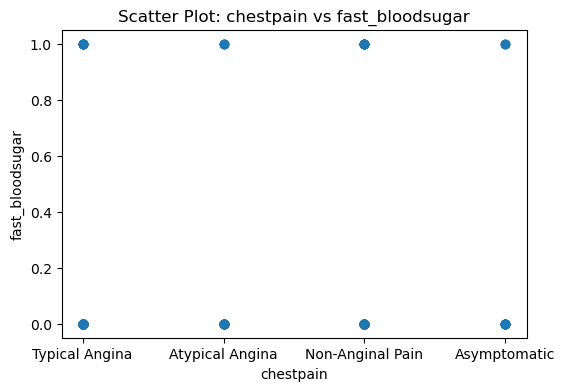

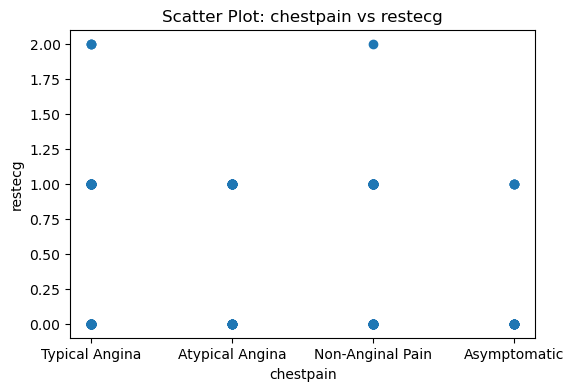

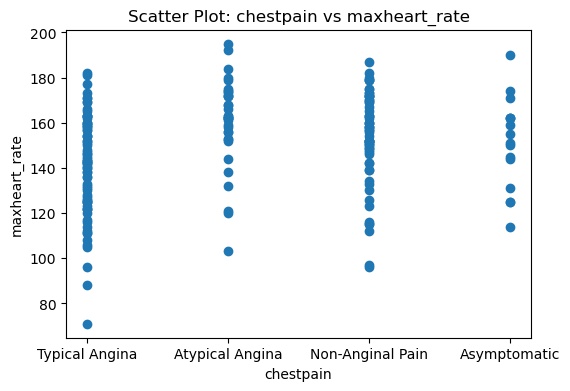

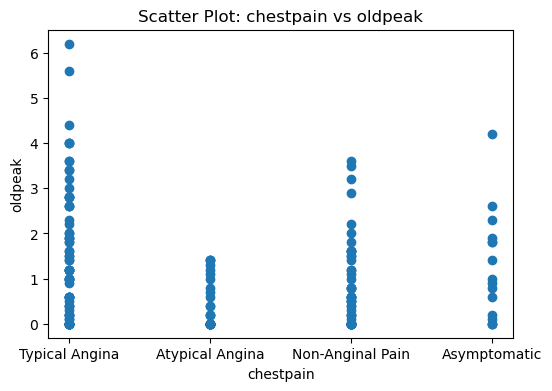

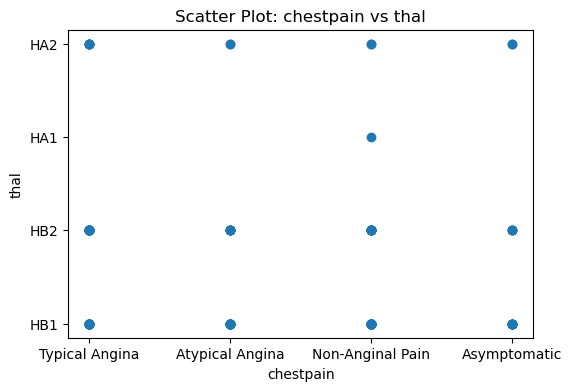

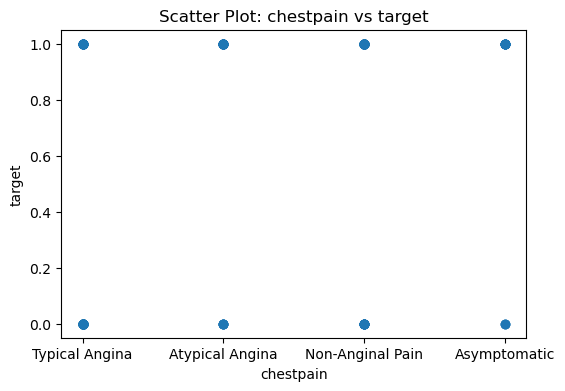

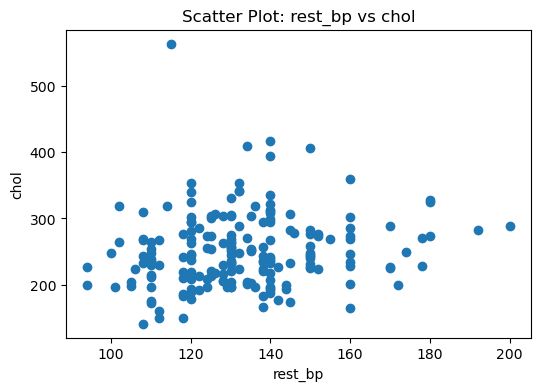

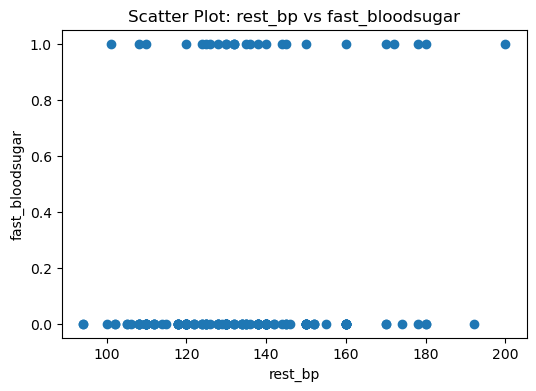

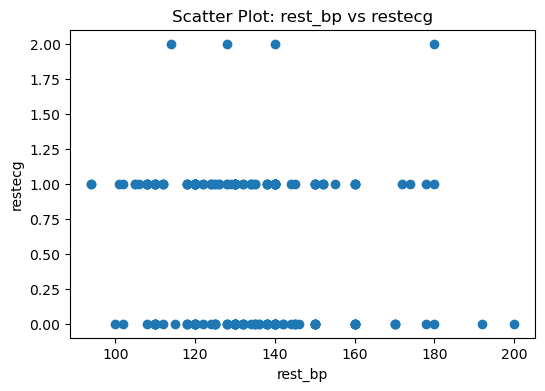

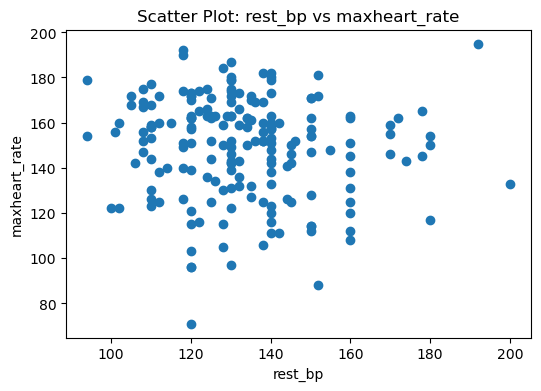

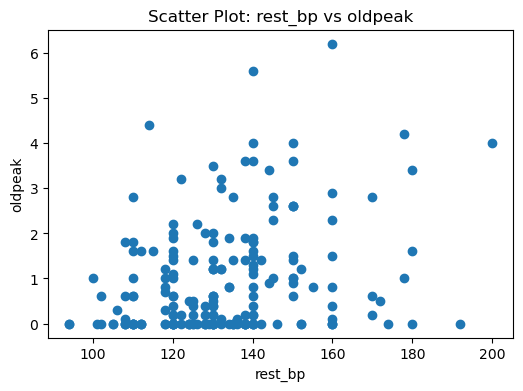

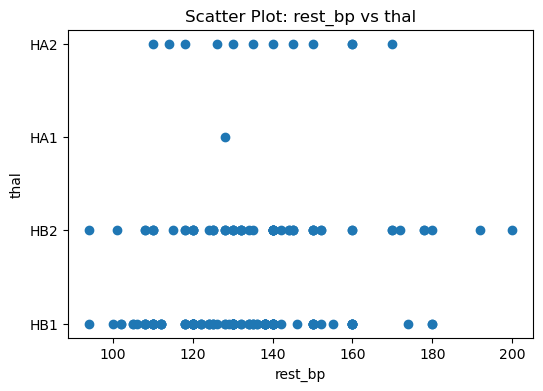

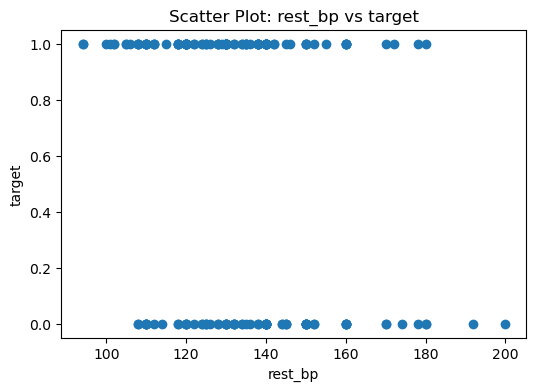

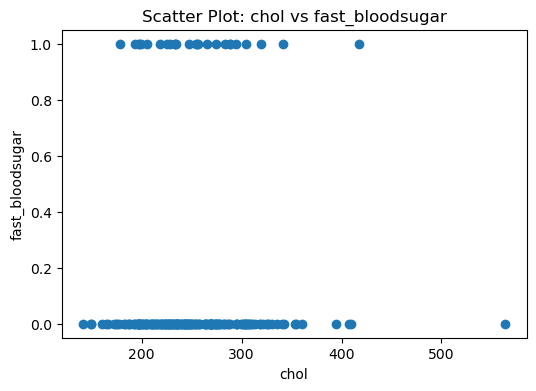

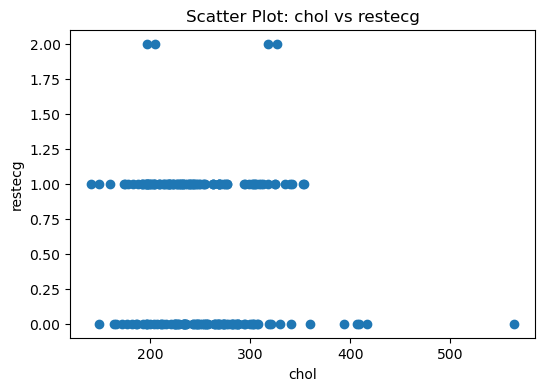

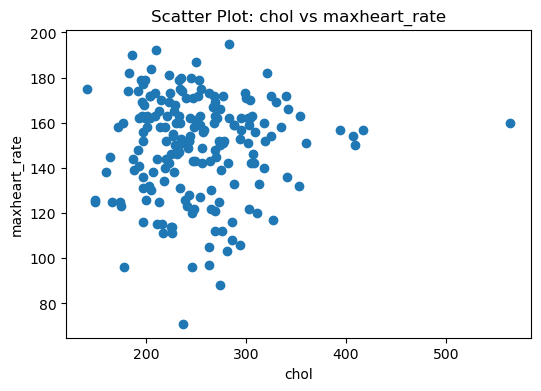

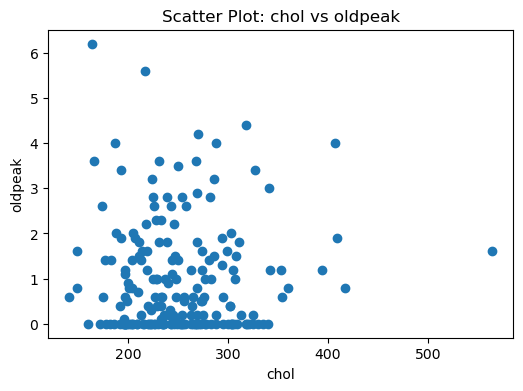

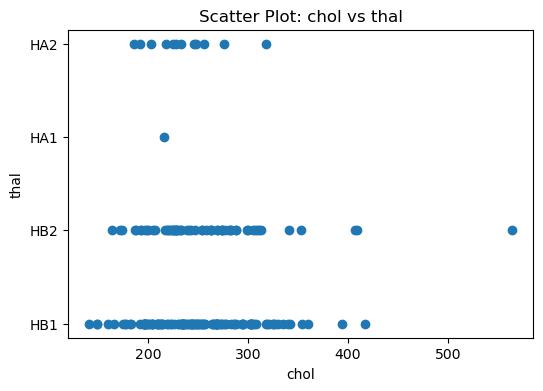

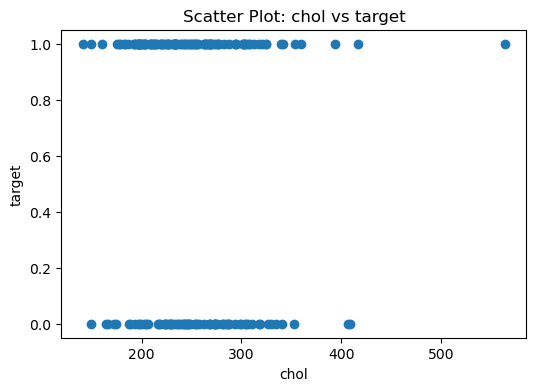

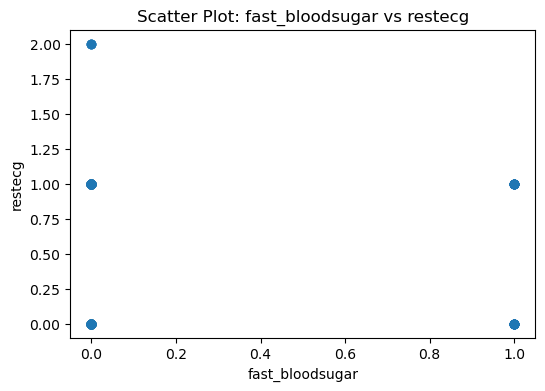

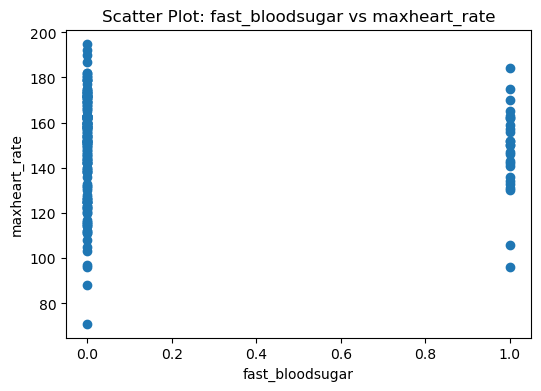

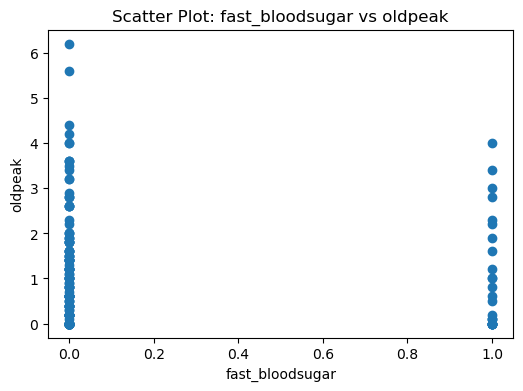

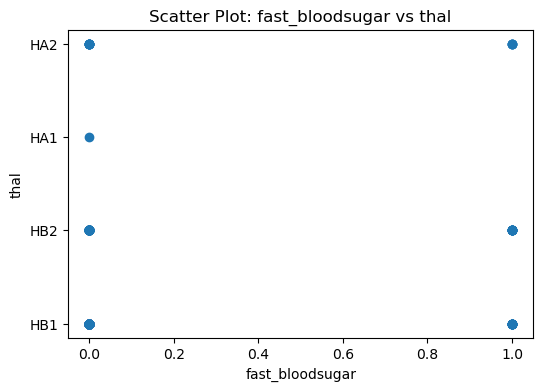

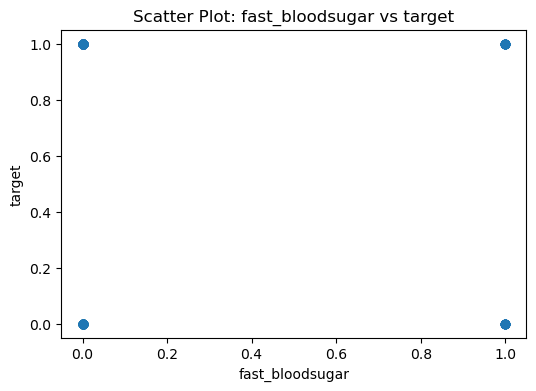

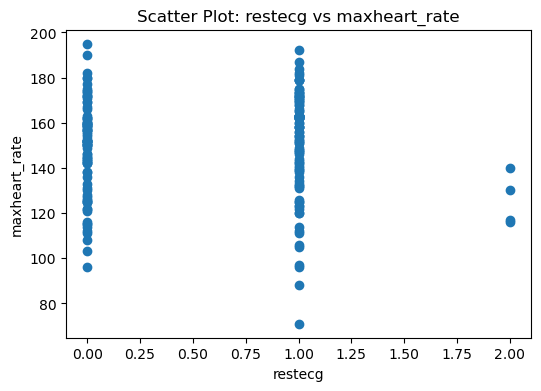

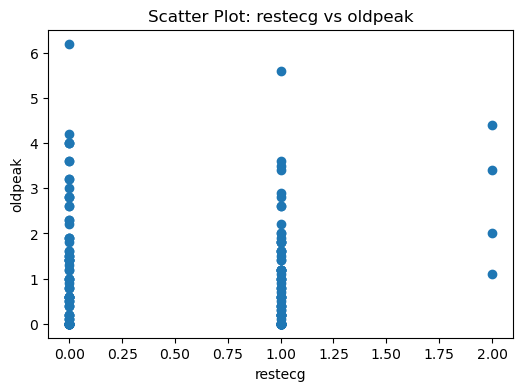

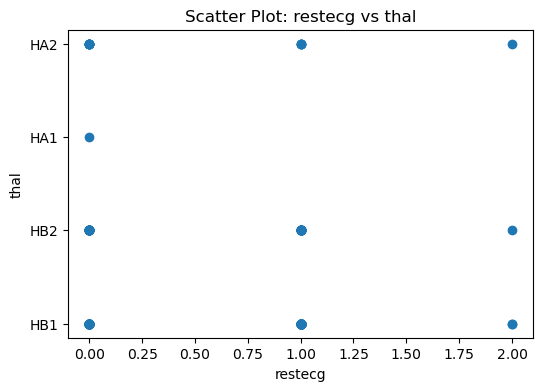

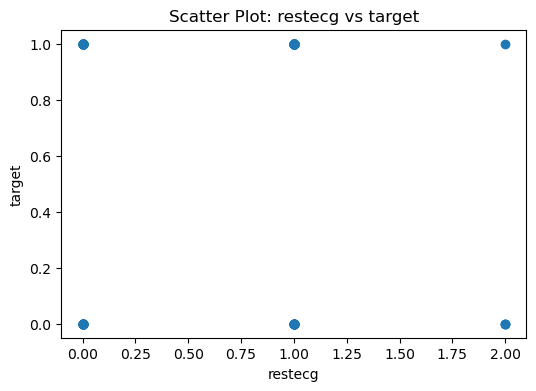

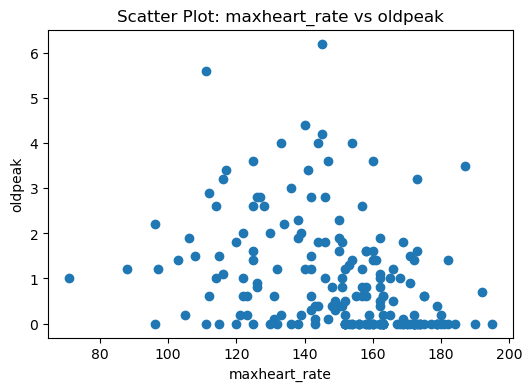

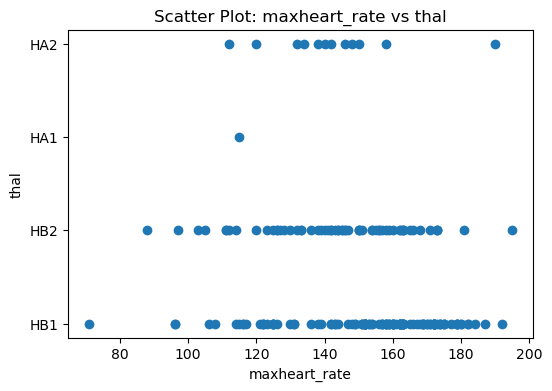

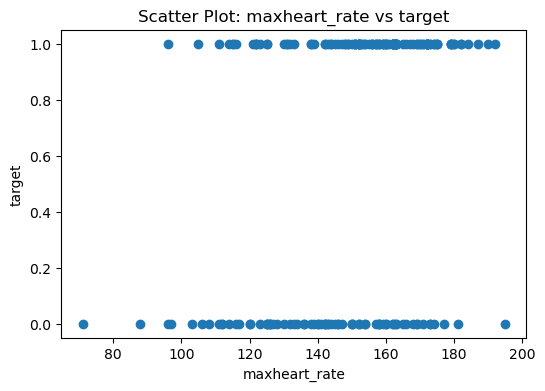

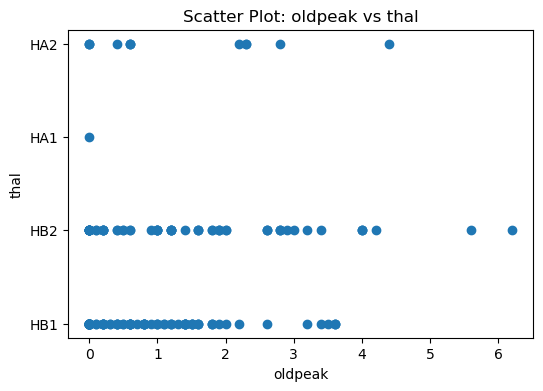

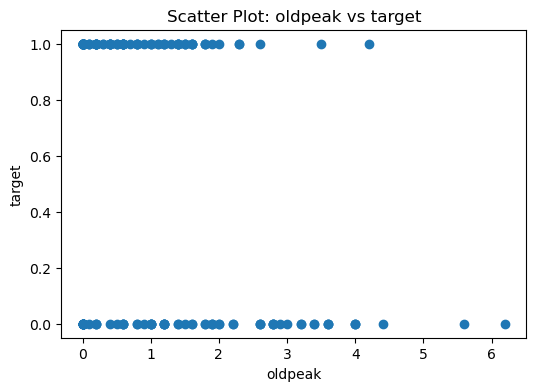

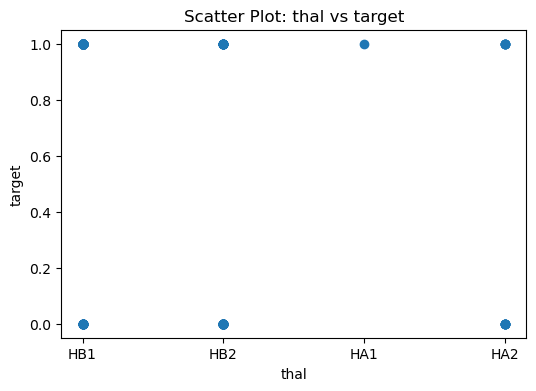

In [32]:

columns = df.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        x = df[columns[i]]
        y = df[columns[j]]

        # Create a scatter plot with a smaller figure size
        plt.figure(figsize=(6, 4))  # Adjust the width and height as needed

        plt.scatter(x, y)

        # Add labels and a title
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.title(f'Scatter Plot: {columns[i]} vs {columns[j]}')
        plt.show()


# Training the model using linear regression


importing the packages

In [29]:
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [5]:

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


ValueError: could not convert string to float: 'M'

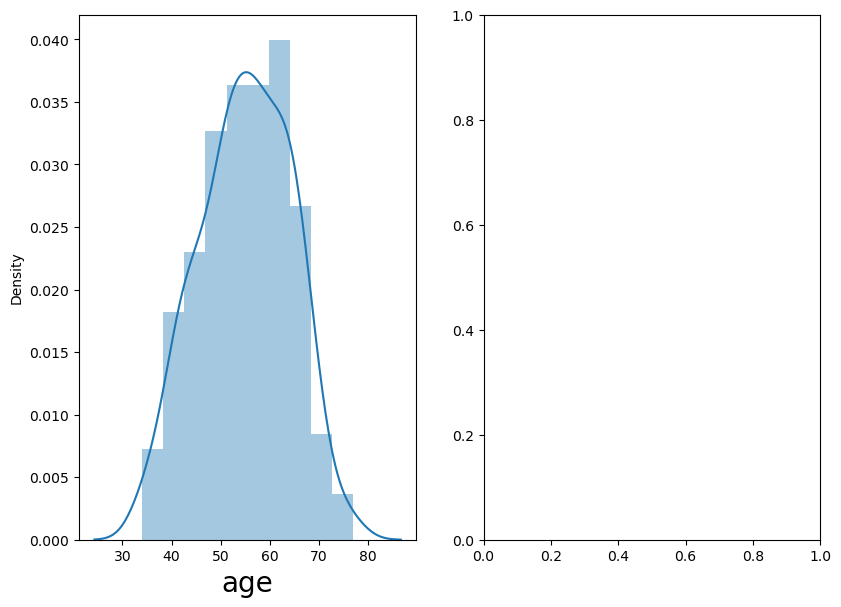

In [35]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column]) # to show all types
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [6]:

input_params = {'Start_feature': 'age',  'End_feature': 'thal','Target': 'target'}
start_feature = input_params['Start_feature']
end_feature = input_params['End_feature']
target_feature = input_params['Target']

X= df.loc[:, start_feature:end_feature]
y = df[target_feature]

print(X.head())
print(y.head())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [7]:
X.shape

(303, 13)

In [8]:
y.shape

(303,)

In [9]:
scaler=StandardScaler()
x_sca=scaler.fit_transform(X)
x_sca

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

splitting data into testing and training data

In [10]:

X_train, X_test, y_train, y_test = train_test_split(x_sca, y, test_size=0.25, random_state=42)

y_train.shape


(227,)

In [11]:

X_train.shape

(227, 13)

loading the model

In [30]:
#model={'lr':LinearRegression(),'lgR': LogisticRegression()}
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3)}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3)}


fitting the data into the model 

In [ ]:
df.tail(2)

In [16]:

for key, value in model.items():
    value.fit(X_train, y_train)
    if key == 'rf':
        print('RFC Feature Importances:', value.feature_importances_)
        print()
    
    elif key == 'lgR':
        print('Logistic:', value.intercept_)
        print('Logistic coef:' ,  value.coef_)

    elif key == 'dt':
        print('DT: Decision Trees do not have intercept or coefficients.')
        print()
   
    elif key == 'lgR':
        if hasattr(value, 'intercept_'):
            print('Logistic Intercept:', value.intercept_)
        else:
            print('Logistic does not have an intercept.')
        
        if hasattr(value, 'coef_'):
            print('Logistic Coefficients:', value.coef_)
        else:
            print('Logistic does not have coefficients.')
        print()

   

DT: Decision Trees do not have intercept or coefficients.

RFC Feature Importances: [0.08889779 0.02683395 0.12408608 0.08095912 0.0716922  0.00945061
 0.02161524 0.109778   0.05903442 0.11618059 0.04676375 0.14211533
 0.10259295]

Logistic: [0.00607588]
Logistic coef: [[-0.02615488 -0.67636678  0.87593109 -0.22538511 -0.11788377  0.03387529
   0.38448106  0.36599596 -0.52300921 -0.695509    0.44218501 -0.8474424
  -0.61790358]]


In [31]:

y_preds = {}

for key, value in model.items():
    value.fit(X_train, y_train)
    y_pred = value.predict(X_test)

    y_preds[key] = y_pred
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [32]:
value.score(X_train,y_train)

0.8898678414096917

In [33]:
value.score(X_test,y_test)

0.868421052631579

In [34]:
# model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression()}
mae = {}
mse = {}
r2 = {}
rmse={}
acu = {}

for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acu[key] = accuracy_score(y_test, value)    

print("\nR-squared:",r2)
print("\nRoot Mean Squared Error:",rmse)
print("\nAccuracy ",acu)

best_model = max(acu, key=acu.get) and min(rmse, key=rmse.get)
print("\nBest Model:", best_model)




R-squared: {'dt': 0.25853658536585356, 'rf': 0.4174216027874563, 'lgR': 0.47038327526132395, 'nb': 0.5233449477351916, 'svm': 0.4174216027874563, 'knn': 0.47038327526132395}

Root Mean Squared Error: {'dt': 0.42919753763947605, 'rf': 0.3804429551263411, 'lgR': 0.3627381250550058, 'nb': 0.34412360080584264, 'svm': 0.3804429551263411, 'knn': 0.3627381250550058}

Accuracy  {'dt': 0.8157894736842105, 'rf': 0.8552631578947368, 'lgR': 0.868421052631579, 'nb': 0.881578947368421, 'svm': 0.8552631578947368, 'knn': 0.868421052631579}

Best Model: nb


In [21]:
for key, value in model.items():
    value.fit(X_train, y_train)
print('target',model['lgR'].predict(scaler.transform([[57,1,0,130,131,0,1,115,1,1.2,1,1,3,]])))

target [0]


In [ ]:
df.head(4)

In [22]:

predictions = {}
age = int(input("Please enter your age: "))
sex = int(input("Please enter your gender (1 for Male, 0 for Female): "))
cp = int(input("Please rate your chest pain (0, 1, 2, or 3): "))
trestbps = int(input("Please enter your resting blood pressure: "))
chol = int(input("Please enter your cholesterol level: "))
fbs = int(input("Please enter your fasting blood sugar (1 for True, 0 for False): "))
restecg = int(input("Please enter your resting ECG result: "))
thalach = int(input("Please enter your maximum heart rate achieved: "))
exang = int(input("Please enter if you have exercise-induced angina (1 for Yes, 0 for No): "))
oldpeak = float(input("Please enter your ST depression induced by exercise: "))
slope = int(input("Please enter your slope of the peak exercise ST segment: "))
ca = int(input("Please enter the number of major vessels colored by fluoroscopy (0-4): "))
thal = int(input("Please enter your thalassemia type (0-3): "))

user_input = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]

for key, value in model.items():
    
    scaled_input = scaler.transform(user_input)
    prediction = value.predict(scaled_input)
    predictions[key] = prediction[0]
for key, prediction in predictions.items():
    print(f"Prediction for model {key}: {prediction}")


Please enter your age: 53
Please enter your gender (1 for Male, 0 for Female): 1
Please rate your chest pain (0, 1, 2, or 3): 2
Please enter your resting blood pressure: 160
Please enter your cholesterol level: 276
Please enter your fasting blood sugar (1 for True, 0 for False): 0
Please enter your resting ECG result: 3.7


ValueError: invalid literal for int() with base 10: '3.7'

In [ ]:
53 1 2 160 276 0 1 175 0 3.7 0 1 2